In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

Read in Data

In [2]:
df_mental = pd.read_csv(r'C:\Users\gdlar\OneDrive\Documents\Project 2\MHCLD_PUF_2018.csv')
df_healthcare = pd.read_csv(r'C:\Users\gdlar\OneDrive\Documents\Project 2\2018_Child_and_Adult_Health_Care_Quality_Measures.csv')
df_poverty = pd.read_csv(r'C:\Users\gdlar\OneDrive\Documents\Project 2\raw_data.csv', skiprows=2)
xls = pd.ExcelFile(r'C:\Users\gdlar\OneDrive\Documents\Project 2\CS5010Project.xlsx') #excel file with codes for df_meantal
df_states_mental = pd.read_excel(xls, 'STATEFIP State Codes') #spreadsheet page with the codes for states df_mental dataframe
df_poverty_percent = pd.read_excel(xls, 'Poverty Rate by State 2018')
df_RACE = pd.read_excel(xls, 'RACE')

In [3]:
#create dataframe that adds column to decode states
df_mental_states = df_mental.merge(df_states_mental, left_on="STATEFIP", right_on="Value")

In [4]:
#create dataframe that shows race information
df_mental_race = df_mental.merge(df_RACE, left_on="RACE", right_on="Value")
df_mental_race_reduced = df_mental_race[df_mental_race['RACE'] != -9]
df_mental_race_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5758236 entries, 0 to 6213790
Data columns (total 42 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   YEAR         int64 
 1   AGE          int64 
 2   EDUC         int64 
 3   ETHNIC       int64 
 4   RACE         int64 
 5   GENDER       int64 
 6   SPHSERVICE   int64 
 7   CMPSERVICE   int64 
 8   OPISERVICE   int64 
 9   RTCSERVICE   int64 
 10  IJSSERVICE   int64 
 11  MH1          int64 
 12  MH2          int64 
 13  MH3          int64 
 14  SUB          int64 
 15  MARSTAT      int64 
 16  SMISED       int64 
 17  SAP          int64 
 18  EMPLOY       int64 
 19  DETNLF       int64 
 20  VETERAN      int64 
 21  LIVARAG      int64 
 22  NUMMHS       int64 
 23  TRAUSTREFLG  int64 
 24  ANXIETYFLG   int64 
 25  ADHDFLG      int64 
 26  CONDUCTFLG   int64 
 27  DELIRDEMFLG  int64 
 28  BIPOLARFLG   int64 
 29  DEPRESSFLG   int64 
 30  ODDFLG       int64 
 31  PDDFLG       int64 
 32  PERSONFLG    int64 
 33  SCHIZOF

In [5]:
#create graphs without unknown values - to help see distributions
df_mental_2 = df_mental_states[df_mental_states['STATEFIP'] != 99]
df_mental_3 = df_mental_2[df_mental_states['AGE'] != -9]
df_mental_3.tail()

<ipython-input-5-039bbcd1731a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mental_3 = df_mental_2[df_mental_states['AGE'] != -9]


,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID,Value,State
6213394,2018,8,-9,4,4,1,2,2,1,2,...,0,1,0,0,72,0,0,20186213395,72,Puerto Rico
6213395,2018,7,4,3,5,2,2,2,1,2,...,0,0,0,0,72,0,0,20186213396,72,Puerto Rico
6213396,2018,14,-9,-9,2,1,2,2,1,2,...,0,1,0,0,72,0,0,20186213397,72,Puerto Rico
6213397,2018,14,-9,3,-9,1,2,2,1,2,...,0,1,0,0,72,0,0,20186213398,72,Puerto Rico
6213398,2018,14,-9,3,6,2,2,2,2,1,...,0,1,0,0,72,0,0,20186213399,72,Puerto Rico


In [6]:
#all toatls of each column per state
df_state_totals = df_mental_3.groupby(['State']).count()['AGE'].to_frame().reset_index()
df_state_totals.rename(columns={df_state_totals.columns[1]: "total_cases"}, inplace=True)
df_state_totals.head()

,State,total_cases
0,Alabama,102416
1,Arizona,224769
2,Arkansas,74888
3,California,691136
4,Colorado,150557


array([[<AxesSubplot:title={'center':'Alabama'}>,
        <AxesSubplot:title={'center':'Arizona'}>,
        <AxesSubplot:title={'center':'Arkansas'}>,
        <AxesSubplot:title={'center':'California'}>,
        <AxesSubplot:title={'center':'Colorado'}>,
        <AxesSubplot:title={'center':'Connecticut'}>,
        <AxesSubplot:title={'center':'Delaware'}>],
       [<AxesSubplot:title={'center':'District of Columbia'}>,
        <AxesSubplot:title={'center':'Florida'}>,
        <AxesSubplot:title={'center':'Hawaii'}>,
        <AxesSubplot:title={'center':'Idaho'}>,
        <AxesSubplot:title={'center':'Illinois'}>,
        <AxesSubplot:title={'center':'Indiana'}>,
        <AxesSubplot:title={'center':'Iowa'}>],
       [<AxesSubplot:title={'center':'Kentucky'}>,
        <AxesSubplot:title={'center':'Louisiana'}>,
        <AxesSubplot:title={'center':'Maryland'}>,
        <AxesSubplot:title={'center':'Massachusetts'}>,
        <AxesSubplot:title={'center':'Michigan'}>,
        <AxesSubplo

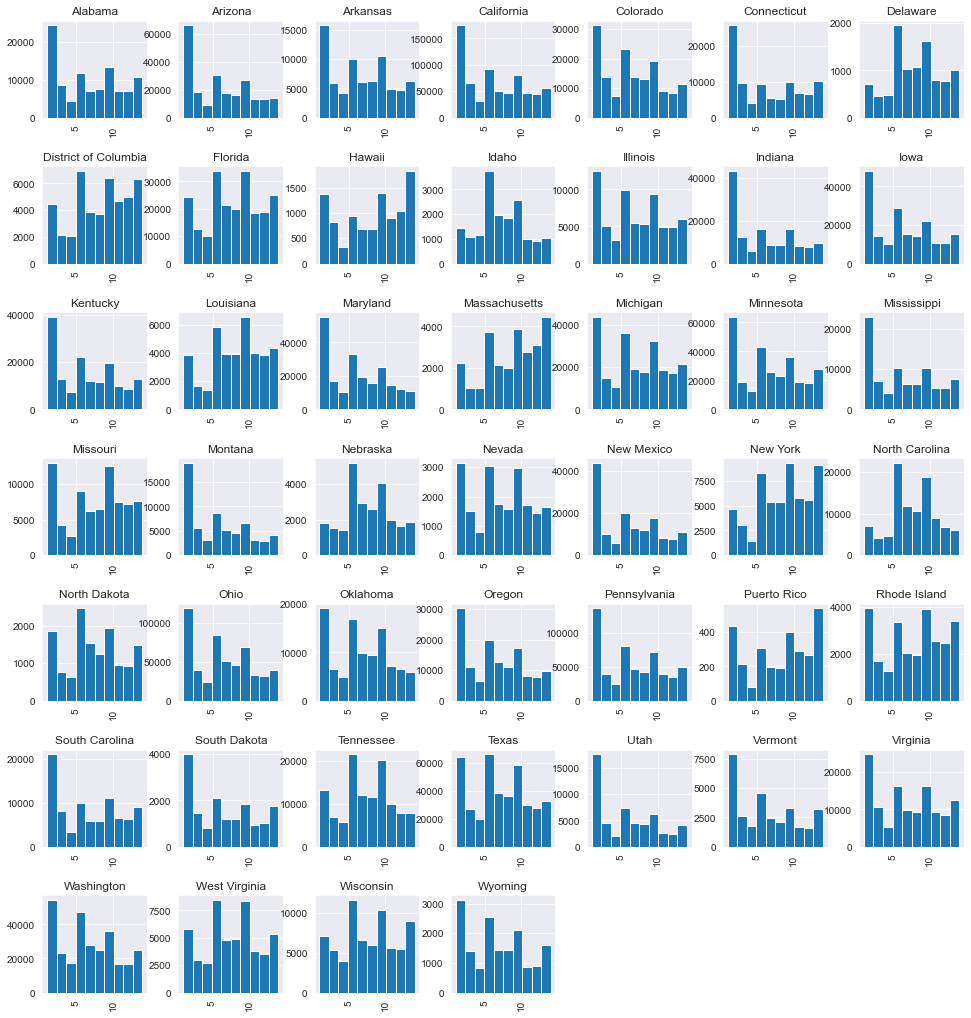

In [7]:
#graph of number of cases per age group per state
df_mental_3['AGE'].hist(by = df_mental_2['State'], figsize = (16,18))

The next three cells can be used as a template to investigate varibales, in their basic count form

Can I write this as a function to call?

In [8]:
#def to get the totals per state  - work later
def Totals_per_state(column):
    topic = df_mental_3.groupby('State')[column].value_counts().to_frame()
    topic = topci.reset_index(0)
    topic.rename(columns={topic.columns[1]: "total"}, inplace=True)
    new_topic = topic.reset_index()
    
    
    


In [9]:
age = df_mental_3.groupby('State')['AGE'].value_counts().to_frame()
age = age.reset_index(0)

In [10]:
age.rename(columns={age.columns[1]: "total"}, inplace=True)
new_age = age.reset_index()

Which age group has the highest number of cases?

Text(0, 0.5, 'Number of Cases')

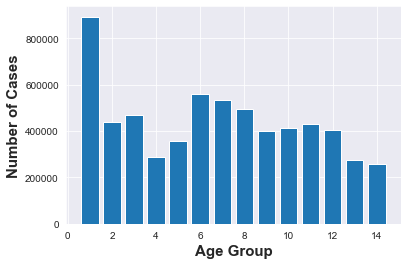

In [11]:
#totals per age group, no states
Totals_per_group = age.groupby('AGE')['total'].sum().to_frame().reset_index()
plt.bar(Totals_per_group['AGE'], Totals_per_group['total'])
plt.xlabel('Age Group', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Cases', fontweight ='bold', fontsize = 15)

Group 1 has the highest number of cases

In [12]:
#don't need with reduced dataframe - can use if need to group the larger file
#sage = df_mental_4.groupby(['State', 'AGE'])
#sage.head()
Totals_per_group.head()

,AGE,total
0,1,892484
1,2,438964
2,3,469155
3,4,288181
4,5,357226


In [13]:
#State totals for age group 1, 14
age_1 = new_age.where(new_age['AGE'] == 1).dropna()
age_14 = new_age.where(new_age['AGE'] == 14).dropna()
age_14.tail(50)

,AGE,State,total
10,14.0,Alabama,5774.0
27,14.0,Arizona,4869.0
40,14.0,Arkansas,3131.0
55,14.0,California,26170.0
69,14.0,Colorado,5711.0
79,14.0,Connecticut,5132.0
92,14.0,Delaware,516.0
106,14.0,District of Columbia,2751.0
123,14.0,Florida,11963.0
127,14.0,Hawaii,964.0


Which State has the highest number of Age 1 cases?

<AxesSubplot:xlabel='State'>

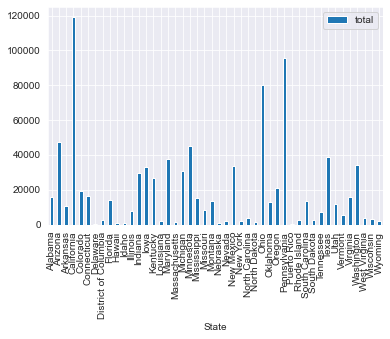

In [14]:
age_1.plot(x = 'State', y = 'total', kind = 'bar')
#plot against poverty

California has the highest number of Age 1 cases.

<AxesSubplot:xlabel='State'>

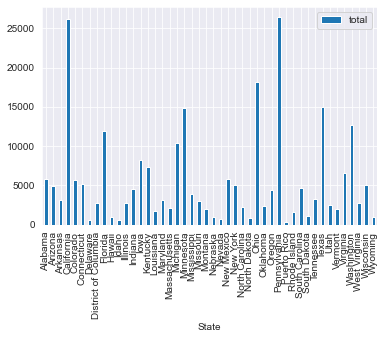

In [15]:
age_14.plot(x = 'State', y = 'total', kind = 'bar')

Do number of cases and poverty rate have any relation?

In [16]:
df_poverty_edit = df_poverty[1:-8]
df_poverty_edit.head(10)

,Location,Under 100%,100-199%,200-399%,400%+,Total,Footnotes
1,Alabama,797800.0,938500.0,1479000.0,1537400.0,4752600.0,NaN
2,Alaska,76100.0,103600.0,208900.0,320500.0,709100.0,NaN
3,Arizona,973900.0,1384200.0,2196900.0,2449300.0,7004300.0,NaN
4,Arkansas,508200.0,654800.0,934300.0,824000.0,2921300.0,NaN
5,California,4940800.0,6603400.0,10648200.0,16553400.0,38745900.0,NaN
6,Colorado,541700.0,832800.0,1640000.0,2540600.0,5555200.0,NaN
7,Connecticut,358600.0,460200.0,813100.0,1834500.0,3466300.0,NaN
8,Delaware,110600.0,145400.0,268800.0,412900.0,937700.0,NaN
9,District of Columbia,111000.0,72200.0,124500.0,360200.0,667900.0,NaN
10,Florida,2791200.0,4124100.0,6709200.0,7219000.0,20843500.0,NaN


Which state has the highest poverty (This graph is in total numbers, not percent)?

<AxesSubplot:xlabel='Location'>

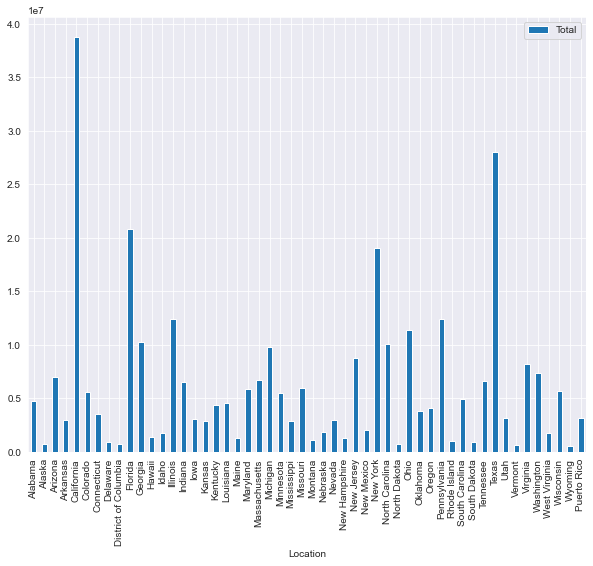

In [17]:
df_poverty_edit.plot(x = 'Location', y = 'Total', kind = 'bar', figsize = (10,8))

California has the highest number of cases of poverty

In [18]:
df_poverty_percent1 = df_poverty_percent[2:]
df_poverty_percent1.columns = df_poverty_percent1.iloc[0]
df_poverty_percent1 = df_poverty_percent[3:-2]
df_poverty_percent1.columns = ['State','Change in poverty rate, 2000 to 2018', 'Change 2007 to 2018', 'Change in poverty rate, 2017 to 2018', '2018 poverty rate relative to national average', 'Poverty rate 2018']
df_poverty_percent1['PovertyRate2018%'] = df_poverty_percent1['Poverty rate 2018'] * 100
df_poverty_percent1['State'] = df_poverty_percent1['State'].str.strip()
df_poverty_percent1.head()

<ipython-input-18-fce33d0ce3c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poverty_percent1['PovertyRate2018%'] = df_poverty_percent1['Poverty rate 2018'] * 100
<ipython-input-18-fce33d0ce3c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poverty_percent1['State'] = df_poverty_percent1['State'].str.strip()


,State,"Change in poverty rate, 2000 to 2018",Change 2007 to 2018,"Change in poverty rate, 2017 to 2018",2018 poverty rate relative to national average,Poverty rate 2018,PovertyRate2018%
3,Alabama,0.012,-0.001,-0.001,0.037,0.168,16.8
4,Alaska,0.018,0.02,-0.002,-0.022,0.109,10.9
5,Arizona,-0.016,-0.002,-0.009,0.009,0.14,14.0
6,Arkansas,0.002,-0.007,0.008,0.041,0.172,17.2
7,California,-0.009,0.004,-0.005,-0.003,0.128,12.8


In [19]:
#found that the column had extra spaces at the end of the column 
df_poverty_percent1.info()
print(df_poverty_percent1['State'][3] + ',')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 3 to 53
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   State                                           51 non-null     object
 1   Change in poverty rate, 2000 to 2018            51 non-null     object
 2   Change 2007 to 2018                             51 non-null     object
 3   Change in poverty rate, 2017 to 2018            51 non-null     object
 4   2018 poverty rate relative to national average  51 non-null     object
 5   Poverty rate 2018                               51 non-null     object
 6   PovertyRate2018%                                51 non-null     object
dtypes: object(7)
memory usage: 2.9+ KB
Alabama,


In [20]:
#df_state_totals
#df_mental_states = df_mental.merge(df_states_mental, left_on="STATEFIP", right_on="Value")
poverty_mental_totals = df_poverty_percent1.merge(df_state_totals, on="State")
poverty_mental_totals.head()

,State,"Change in poverty rate, 2000 to 2018",Change 2007 to 2018,"Change in poverty rate, 2017 to 2018",2018 poverty rate relative to national average,Poverty rate 2018,PovertyRate2018%,total_cases
0,Alabama,0.012,-0.001,-0.001,0.037,0.168,16.8,102416
1,Arizona,-0.016,-0.002,-0.009,0.009,0.14,14.0,224769
2,Arkansas,0.002,-0.007,0.008,0.041,0.172,17.2,74888
3,California,-0.009,0.004,-0.005,-0.003,0.128,12.8,691136
4,Colorado,0.009,-0.024,-0.007,-0.035,0.096,9.6,150557


In [21]:
poverty_mental_reduced = poverty_mental_totals[['State', 'PovertyRate2018%', 'total_cases']]

<AxesSubplot:xlabel='PovertyRate2018%', ylabel='total_cases'>

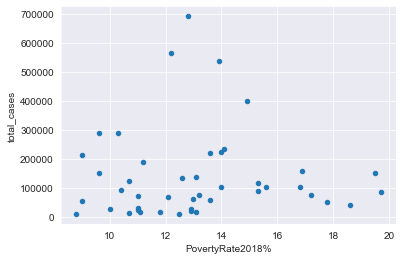

In [22]:
poverty_mental_reduced.plot(x = 'PovertyRate2018%', y = 'total_cases', kind = 'scatter')
#No obvious correlation, what are those max values?

In [23]:
total_max = poverty_mental_reduced['total_cases'].idxmax()
poverty_mental_reduced['State'][3]
#is it just total number skewing the data, how about divide total cases by popluation?

'California'

In [24]:
#https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html data source
state_pop = pd.read_excel(r'C:\Users\gdlar\OneDrive\Documents\Project 2\nst-est2019-01.xlsx')
#df_state_pop = pd.read_excel(xls, 'STATEFIP State Codes')
state_pop.head()
state_pop.columns = state_pop.iloc[2]
state_pop.rename(columns={state_pop.columns[0]: "State"}, inplace=True)
state_pop=state_pop[8:]
state_pop['State'] = state_pop['State'].str.replace('.','') #remove extra . to merge

#state_pop.columns.map(type) #had to check what the column types were, wasn't able to access columns decided to map to string
state_pop.columns =state_pop.columns.map(str)
state_pop.head()

<ipython-input-24-d4c2c02fb980>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  state_pop['State'] = state_pop['State'].str.replace('.','') #remove extra . to merge


2,State,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
8,Alabama,4779736,4780125,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
9,Alaska,710231,710249,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
10,Arizona,6392017,6392288,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
11,Arkansas,2915918,2916031,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
12,California,37253956,37254519,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [25]:
#merge state population to main dataframe for analysis
poverty_mental_pop = poverty_mental_reduced.merge(state_pop, on="State")
poverty_mental_pop_reduced = poverty_mental_pop[['State', 'PovertyRate2018%', 'total_cases', '2018.0']]
poverty_mental_pop_reduced.rename(columns={poverty_mental_pop_reduced.columns[3]: "2018 population"}, inplace=True)
poverty_mental_pop_reduced['cases/pop'] = poverty_mental_pop_reduced['total_cases']/poverty_mental_pop_reduced['2018 population']
poverty_mental_pop_reduced['PovertyRate2018%'] = poverty_mental_pop_reduced['PovertyRate2018%'].astype(float)
poverty_mental_pop_reduced.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             44 non-null     object 
 1   PovertyRate2018%  44 non-null     float64
 2   total_cases       44 non-null     int64  
 3   2018 population   44 non-null     float64
 4   cases/pop         44 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


C:\Users\gdlar\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-25-a42a1dd0ef9d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poverty_mental_pop_reduced['cases/pop'] = poverty_mental_pop_reduced['total_cases']/poverty_mental_pop_reduced['2018 population']
<ipython-input-25-a42a1dd0ef9d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Is there any correlation between poverty (changed y to total cases/population to normalize the values)

<AxesSubplot:xlabel='PovertyRate2018%', ylabel='cases/pop'>

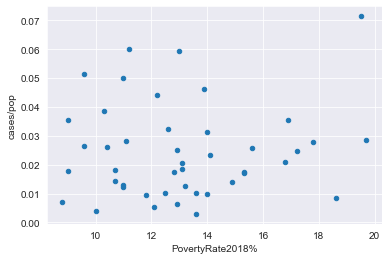

In [26]:
poverty_mental_pop_reduced.plot(x='PovertyRate2018%', y = 'cases/pop', kind = 'scatter')
#results - no real correlation between the mental health cases and poulation

In [27]:
#run SLR to ensure scatter plot results are accurate - There is no predictive abillity in this
x = poverty_mental_pop_reduced['PovertyRate2018%']
x = sm.add_constant(x) #constant is not added by default and must be added
case_model =sm.OLS(poverty_mental_pop_reduced['cases/pop'], x).fit()
print(case_model.summary())

                            OLS Regression Results                            
Dep. Variable:              cases/pop   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.4052
Date:                Fri, 23 Apr 2021   Prob (F-statistic):              0.528
Time:                        10:16:00   Log-Likelihood:                 119.38
No. Observations:                  44   AIC:                            -234.8
Df Residuals:                      42   BIC:                            -231.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0171      0.012  

Since p of PovertyRate2018%  (0.528) is greater than 0.05, we can say that there is no linear relationship between the variables PovertyRate2018% and TotalCases/population. 

California has highest poverty and the highest number of Age1 kids, let's look into that. 

In [42]:
pov_age1 = poverty_mental_pop_reduced.merge(age_1, on="State")
pov_age1.rename(columns={pov_age1.columns[6]: "total_Age1"}, inplace=True)
pov_age1.head()

,State,PovertyRate2018%,total_cases,2018 population,cases/pop,AGE,total_Age1
0,Alabama,16.8,102416,4887681.0,0.020954,1.0,16028.0
1,Arizona,14.0,224769,7158024.0,0.031401,1.0,47293.0
2,Arkansas,17.2,74888,3009733.0,0.024882,1.0,10585.0
3,California,12.8,691136,39461588.0,0.017514,1.0,118892.0
4,Colorado,9.6,150557,5691287.0,0.026454,1.0,19138.0


In [56]:
pov_age14 = pov_age1.merge(age_14, on="State")
pov_age14.rename(columns={pov_age14.columns[8]: "total_Age14"}, inplace=True)
pov_age14.head()

,State,PovertyRate2018%,total_cases,2018 population,cases/pop,AGE_x,total_Age1,AGE_y,total_Age14
0,Alabama,16.8,102416,4887681.0,0.020954,1.0,16028.0,14.0,5774.0
1,Arizona,14.0,224769,7158024.0,0.031401,1.0,47293.0,14.0,4869.0
2,Arkansas,17.2,74888,3009733.0,0.024882,1.0,10585.0,14.0,3131.0
3,California,12.8,691136,39461588.0,0.017514,1.0,118892.0,14.0,26170.0
4,Colorado,9.6,150557,5691287.0,0.026454,1.0,19138.0,14.0,5711.0


<AxesSubplot:xlabel='total_cases', ylabel='total_Age1'>

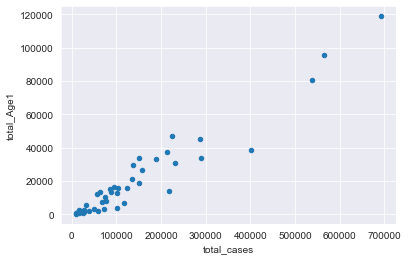

In [46]:
pov_age1.plot(x = 'total_cases', y = 'total_Age1', kind = 'scatter')

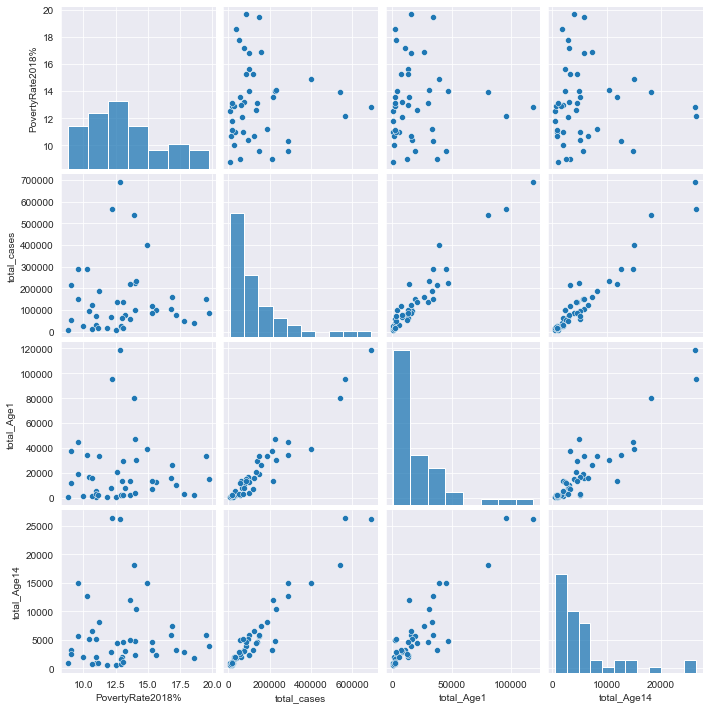

In [58]:
df_plot=pov_age14[['PovertyRate2018%', 'total_cases', 'total_Age1', 'State', 'total_Age14']]
#df_plot = df_plot[(df_plot['State'].isin(['total_Age1', 'total_Age14']))]
sns.pairplot(df_plot)

array([[<AxesSubplot:title={'center':'RACE'}>]], dtype=object)

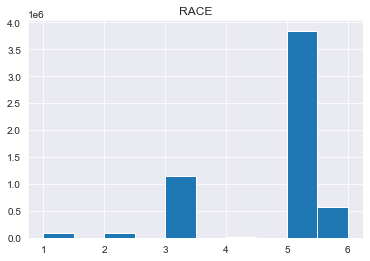

In [28]:
df_mental_race_reduced.hist('RACE')

array([[<AxesSubplot:title={'center':'EDUC'}>]], dtype=object)

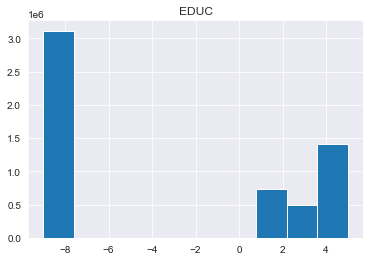

In [29]:
df_mental_race_reduced.hist('EDUC')

array([[<AxesSubplot:title={'center':'MH1'}>]], dtype=object)

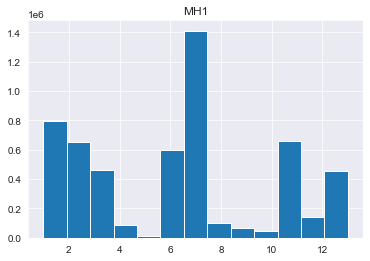

In [30]:
df_mental_MH1 = df_mental[df_mental['MH1'] != -9] #remove missing data coded as -9
df_mental_MH1.hist('MH1', bins = 13)

<ipython-input-69-ff8d74caee08>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mental_4 = df_mental_3[df_mental['MH1'] != -9]


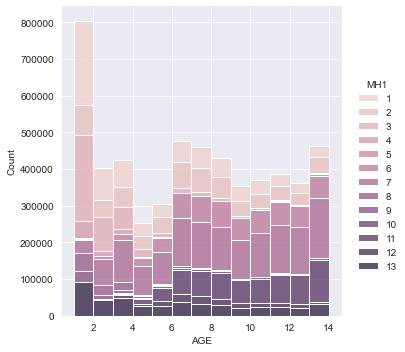

In [69]:
#Age with breakdown of differnt MH1
df_mental_4 = df_mental_3[df_mental['MH1'] != -9]
sns.displot(df_mental_4, x="AGE", hue="MH1", height = 5, multiple="stack", bins = 13)

NameError: name 'axis_2' is not defined

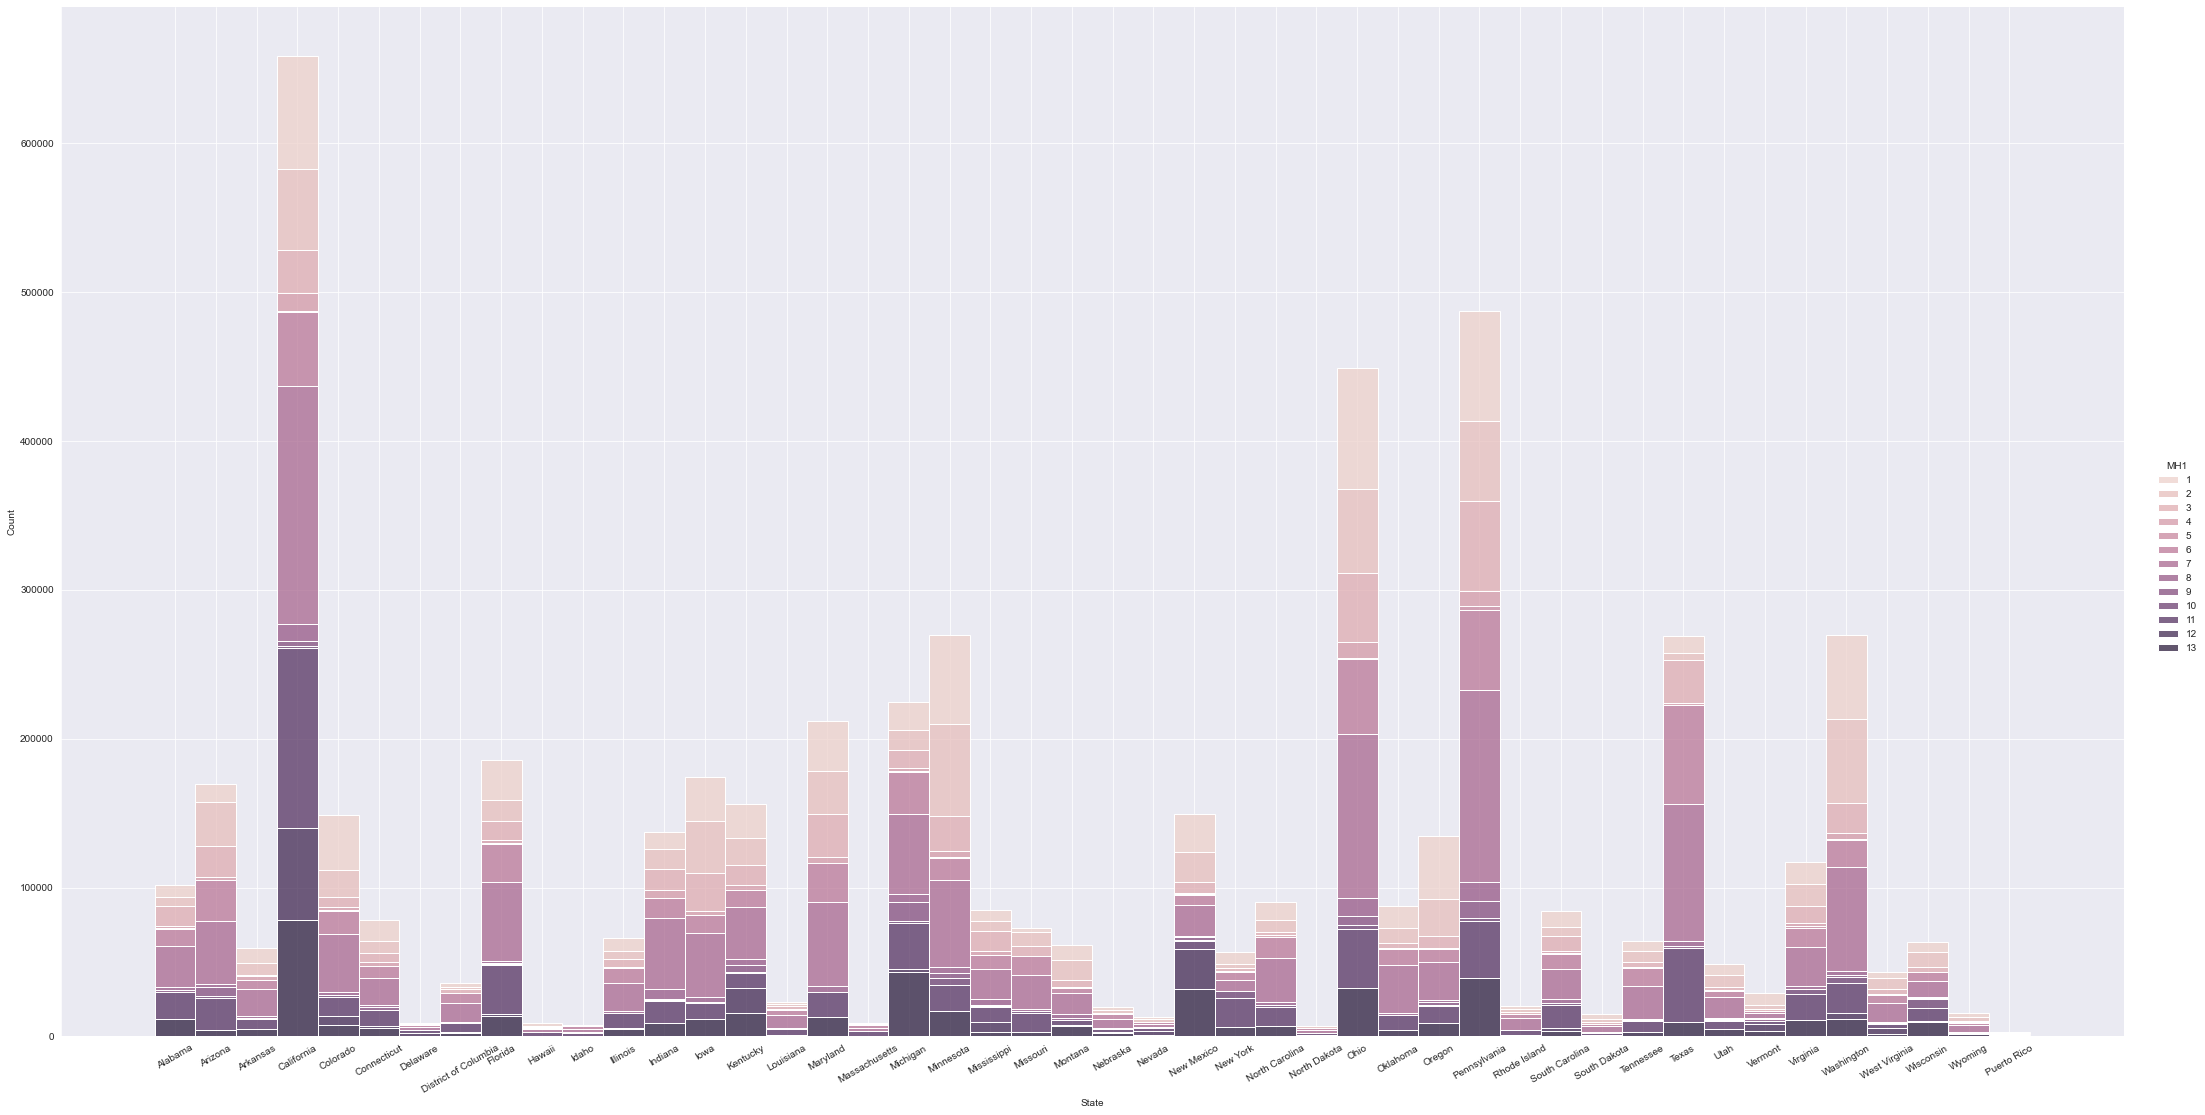

In [79]:
p = sns.displot(df_mental_4, x="State", hue="MH1", height = 15, aspect = 2, multiple="stack", bins = 72)
p.set_xticklabels(rotation=30)

#axis_2 = p.twinx()


axis_2.plot(x = poverty_mental_pop_reduced['State'], y = poverty_mental_pop_reduced['cases/pop'], color= 'blue', label= 'Poverty Cases per Population Totals')
